## Making necessary imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stat
import statsmodels.api as sm

from pandas_datareader import data
from matplotlib.ticker import FuncFormatter 
from scipy.stats import norm
%matplotlib inline
# %matplotlib widget

In [2]:
from datetime import datetime
today = datetime.today().strftime('%Y-%m-%d')

## Loading in the dataset

#### The tickers that we will be using are - Bitcoin, Etherium, Binance, DogeCoin

In [36]:
def load_data(ticker):
    start_date = '2019-01-01'
    end_date = today

    crypto_data = data.DataReader(ticker, 'yahoo', start_date, end_date)

    return crypto_data
    
# apparently there is an error when trying to load multiple crypto tickers in at the same time, so this function loads them individually
# tickers = ['BTC-USD', 'DOGE-USD', 'ETH-USD', 'BNB-USD'] 
bitcoin = load_data('BTC-USD')
doge = load_data('DOGE-USD')
etherium = load_data('ETH-USD')
binance = load_data('BNB-USD')

Text(0.5, 1.0, 'Binance')

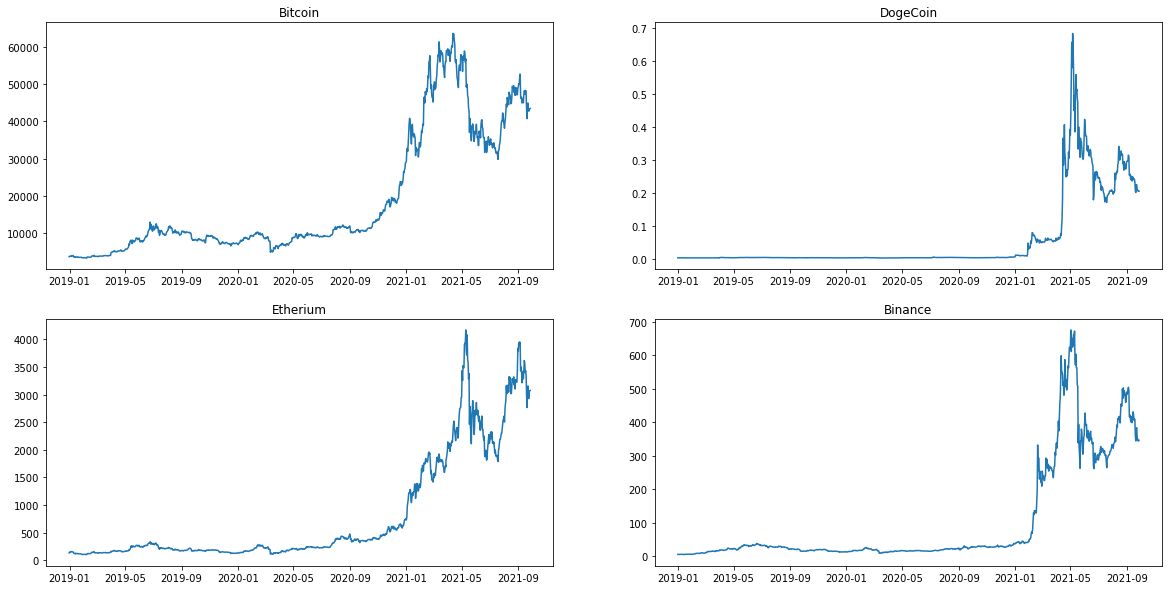

In [37]:
fig, ax = plt.subplots(2, 2, figsize=(20,10))
ax[0, 0].plot(bitcoin['Close'])
ax[0, 0].set_title('Bitcoin')

ax[0, 1].plot(doge['Close'])
ax[0, 1].set_title('DogeCoin')

ax[1, 0].plot(etherium['Close'])
ax[1, 0].set_title('Etherium')

ax[1, 1].plot(binance['Close'])
ax[1, 1].set_title('Binance')

# Statistical Summary

In [38]:
def statistical_summary(crypto):
    print(f"{crypto.head()} \n")
    print("-" * 100)
    
    crypto.info()
    print("-" * 100)
    
    crypto_close = crypto['Close']
    
    print(f"Number of missing values \n{crypto_close.isnull().sum()} missing values \n")
    print("-" * 100)
    
    print(f"Statistics (Close) \n{crypto_close.describe()}\n")
    print("-" * 100)
    
    years = ['2014','2015','2016','2017','2018','2019','2020', '2021']
    print("Yearly data available")
    for year in years:
        print(f"{year} : {crypto_close.loc[year+'-01-01': year+'-12-31'].shape[0]} rows of data available")
    print("")
    print("-" * 100)
    
    print("Skewness and Kurtosis of Crypto")
    pct_change = crypto_close.pct_change()
    print("Skew --- ", pct_change.skew())
    print("Kurtosis ---", pct_change.kurtosis())
    print("")
    print("-" * 100)

# Analyzing Charts

In [41]:
def chart_analysis(crypto, years):
    crypto_close = crypto['Close']
    
    # percentage change
    close_pct_change = crypto_close.pct_change()
    
    # calculating return series
    close_return_series = (1 + close_pct_change).cumprod() - 1
    annualized_returns = (1 + close_return_series.tail(1))**(1/years)-1
    
    # calculating annual volatility
    volatility = np.sqrt(np.log(crypto_close / crypto_close.shift(1)).var()) * np.sqrt(252)
    ahv = np.sqrt(252) * pd.DataFrame.rolling(np.log(crypto_close / crypto_close.shift(1)),window=20).std()
    
    # calculating sharpe ratio
    risk_free_rate = 0
    returns_ts = close_pct_change.dropna()
    avg_daily_returns = returns_ts.mean()
    
    returns_ts['Risk Free Rate'] = risk_free_rate/252
    avg_rfr_ret = returns_ts['Risk Free Rate'].mean()
    returns_ts['Excess Returns'] = returns_ts - returns_ts['Risk Free Rate']
    
    sharpe_ratio = ((avg_daily_returns - avg_rfr_ret) /returns_ts['Excess Returns'].std())*np.sqrt(252)
    
    # statistics for distribution
    close_mean = close_pct_change.mean()
    close_median = close_pct_change.median()
    close_std_dev = close_pct_change.std()
    
    # creating the plots
    fig, ax = plt.subplots(3, 2, figsize=(20,20))
    # pct change
    ax[0, 0].plot(crypto_close)
    ax[0, 0].set_title('Close Prices')
    
    ax[0, 1].plot(close_pct_change)
    ax[0, 1].set_title('Close Percentage Change')
    
    # return series
    ax[1, 0].plot(close_return_series)
    ax[1, 0].set_title('Close Return Series')
    
    # q-q plots
    stat.probplot(close_pct_change, dist = 'norm', fit = True, plot = ax[1,1])
    ax[1, 1].set_title('Q-Q Plot')
    
    # distribution
    x=np.linspace(close_mean - 3 * close_std_dev, close_mean + 3 * close_std_dev, 100)
    ax[2, 0].hist(close_pct_change, bins=60, edgecolor='black');
    ax[2, 0].plot(x, norm.pdf(x, close_mean, close_std_dev),color="r")
    ax[2, 0].set_title('Distribution')
    
    # volatility
    ax[2, 1].plot(ahv)
    ax[2, 1].set_title('Annual Historical Volatility')
    
    print(f"Volatility - {volatility} \n")
    print(f"Annualized Returns - {annualized_returns}\n")
    print(f"Sharpe Ratio - {sharpe_ratio}")

                   High          Low         Open        Close        Volume  \
Date                                                                           
2018-12-31  3868.742920  3725.867432  3866.839111  3742.700439  4.661841e+09   
2019-01-01  3850.913818  3707.231201  3746.713379  3843.520020  4.324201e+09   
2019-01-02  3947.981201  3817.409424  3849.216309  3943.409424  5.244857e+09   
2019-01-03  3935.685059  3826.222900  3931.048584  3836.741211  4.530215e+09   
2019-01-04  3865.934570  3783.853760  3832.040039  3857.717529  4.847965e+09   

              Adj Close  
Date                     
2018-12-31  3742.700439  
2019-01-01  3843.520020  
2019-01-02  3943.409424  
2019-01-03  3836.741211  
2019-01-04  3857.717529   

----------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 998 entries, 2018-12-31 to 2021-09-27
Data columns (total 6 columns):
 #   Column     Non-Null Count 

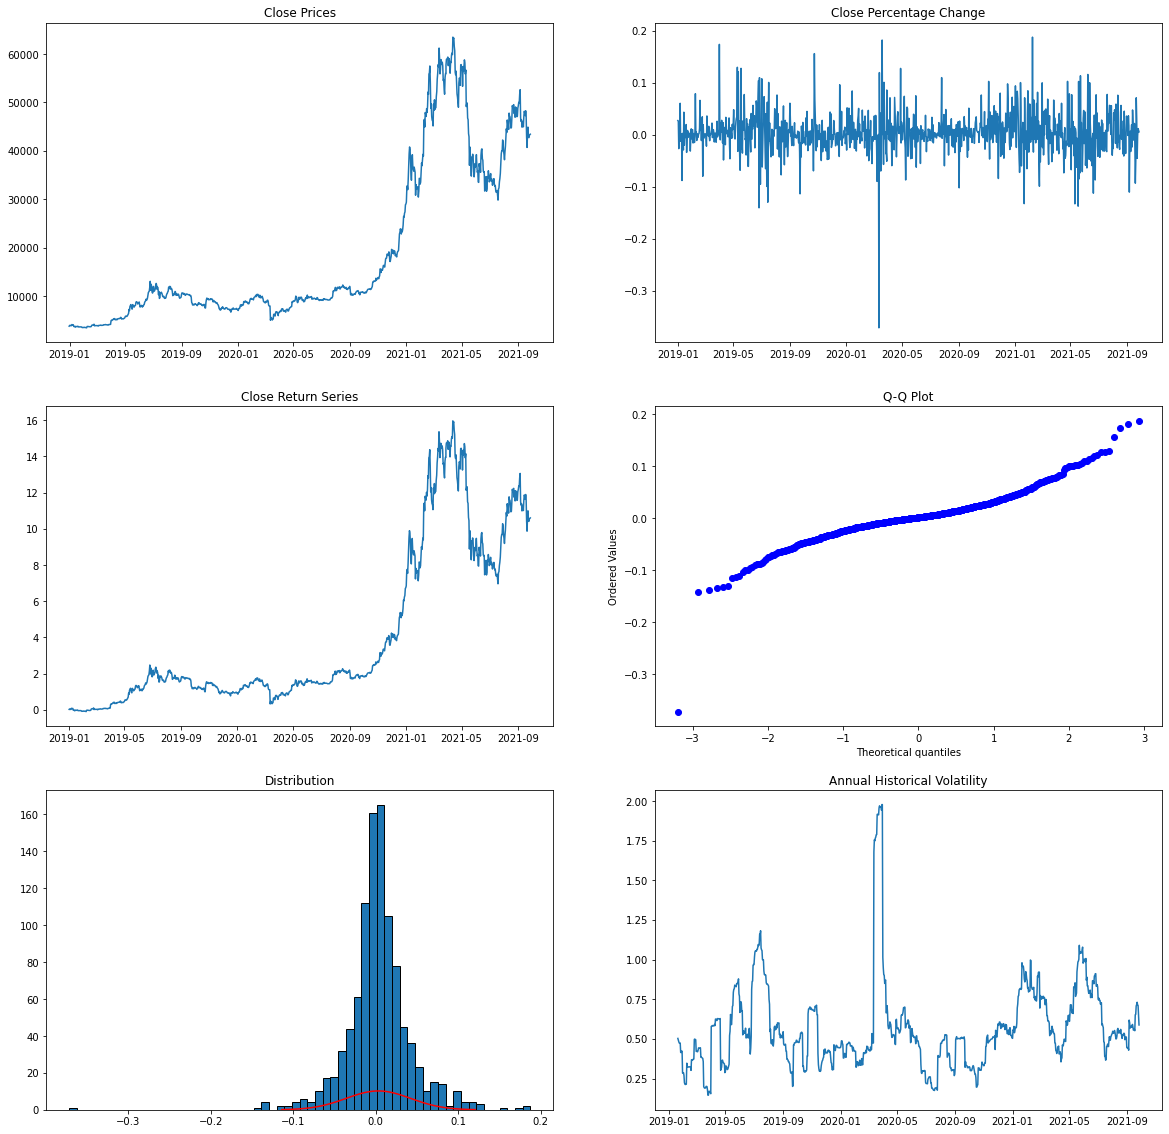

In [42]:
# tickers = bitcoin, doge, etherium, binance

crypto_ticker = bitcoin # change this to the ticker you want to generate eda and charts for
years = 3 # for calculating annualized returns

statistical_summary(crypto_ticker)
chart_analysis(crypto_ticker, years)